In [1238]:
import numpy as np
from numpy import exp
from numpy.linalg import inv
import matplotlib.pyplot as plt
from IPython.display import Image


In [1239]:
def get_NTU(kA,W):
    return kA/W

In [1240]:
def get_R(W1,W2):
    return W1/W2, W2/W1

In [1241]:
def get_Phi(Phi1,Phi2):
    I1 =np.eye(Phi1.shape[0])
    I2 = np.eye(Phi2.shape[0])
    return np.block([[I1-Phi1,Phi1],[Phi2,I2-Phi2]])

In [1242]:
def get_S(S11,S12,S21,S22):
    return np.block([[S11,S12],[S21,S22]])

In [1243]:
def get_Inp(Inp1,Inp2):
    I1 = np.zeros_like(Inp1)
    I2 = np.zeros_like(Inp2)
    return np.block([[Inp1,I2],[I1,Inp2]])

In [1244]:
def get_T_o(Phi,S,Inp,T_I):
    PS = Phi@S
    I = np.eye(PS.shape[0])
    return inv((I-PS))@Phi@Inp@T_I

In [1245]:
def get_Out(Out1,Out2):
    I1 = np.zeros_like(Out1)
    I2 = np.zeros_like(Out2)
    return np.block([[Out1,I1],[I2,Out2]])

In [1246]:
def to_theta(T,theta1_i,theta2_i):
    return (theta1_i-theta2_i)*T+theta2_i

In [1247]:
def plot_theta(theta_o):
    return None

In [1248]:
def plot_matrix(m):
    fig, ax = plt.subplots()
    im = ax.imshow(m)

    fig.tight_layout()
    plt.show()

## Beispiel 2 VDI Wärmeatlas

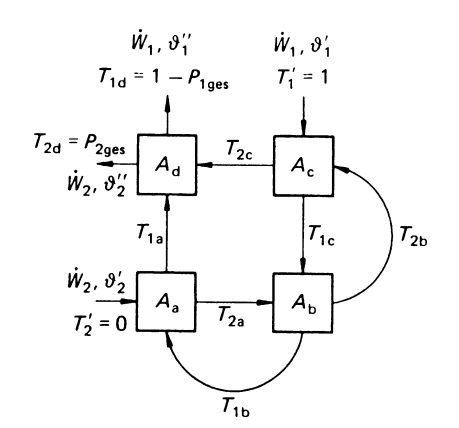

In [1249]:
Image("Bsp1.PNG")

In [1250]:
kA = 4749
W1 = 3500
theta1_i = 100
W2 = 3500
theta2_i = 20

In [1251]:
NTU1 = get_NTU(kA,W1)
NTU1j = NTU1/4
NTU2 = get_NTU(kA,W2)
NTU2j = NTU2/4
display(NTU1j,NTU2j)

0.3392142857142857

0.3392142857142857

In [1252]:
R1, R2 = get_R(W1,W2)
display(R1,R2)

1.0

1.0

In [1253]:
P1j = round(1-exp((exp(-R1*NTU1j)-1)/R1),4)
P2j = round(1-exp((exp(-R2*NTU2j)-1)/R2),4)
display(P1j,P2j)

0.25

0.25

In [1254]:
Phi1 = P1j*np.eye(4)
Phi2 = P2j*np.eye(4)
Phi = get_Phi(Phi1,Phi2)
display(Phi)


array([[0.75, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.75, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.75, 0.  , 0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.75, 0.  , 0.  , 0.  , 0.25],
       [0.25, 0.  , 0.  , 0.  , 0.75, 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.  , 0.  , 0.75, 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.75, 0.  ],
       [0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.75]])

In [1255]:
S11 = np.array([[0,1,0,0],[0,0,1,0],[0,0,0,0],[1,0,0,0]])   #Strom 1: von Zelle p in Zelle j 
S12 = np.zeros((4,4))
S21 = np.zeros((4,4))
S22 = np.array([[0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0]])
S=get_S(S11,S12,S21,S22)
S

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.]])

In [1256]:
Inp1 = np.array([0,0,1,0]).reshape((4,1))
Inp2 = np.array([1,0,0,0]).reshape((4,1))
Inp = get_Inp(Inp1,Inp2)
Inp

array([[0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0]])

In [1257]:
T_I = np.array([[1],[0]])

In [1258]:
T_o = get_T_o(Phi,S,Inp,T_I)
T_o

array([[0.5       ],
       [0.66666667],
       [0.83333333],
       [0.5       ],
       [0.16666667],
       [0.33333333],
       [0.5       ],
       [0.5       ]])

In [1259]:
Out1 = np.array([0,0,0,1])
Out2 = np.array([0,0,0,1])
Out = get_Out(Out1,Out2)
Out

array([[0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [1260]:
T_O = Out@T_o
T_O

array([[0.5],
       [0.5]])

In [1261]:
theta_o = to_theta(T_o,theta1_i,theta2_i)
theta_o

array([[60.        ],
       [73.33333333],
       [86.66666667],
       [60.        ],
       [33.33333333],
       [46.66666667],
       [60.        ],
       [60.        ]])

In [1262]:
temps = np.sort(theta_o.reshape(2,4))
temps

array([[60.        , 60.        , 73.33333333, 86.66666667],
       [33.33333333, 46.66666667, 60.        , 60.        ]])

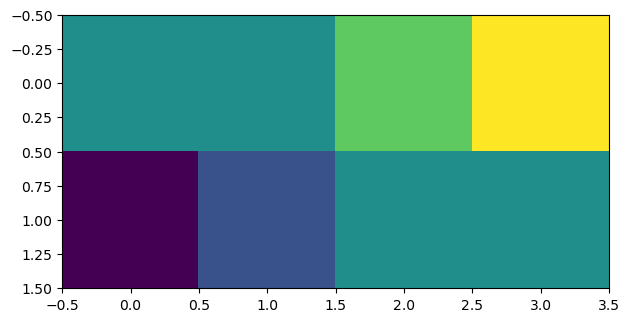

In [1263]:
plot_matrix(temps)

In [1264]:
theta_O = to_theta(T_O,theta1_i,theta2_i)
print(f"Austrittstemperaturen: \u03D1_1^o = {theta_O[0,0]}, \u03D1_2^o = {theta_O[1,0]}")

Austrittstemperaturen: ϑ_1^o = 60.0, ϑ_2^o = 60.0


## Bsp 8.1 Wärmeübertrager Theorie und Praxis

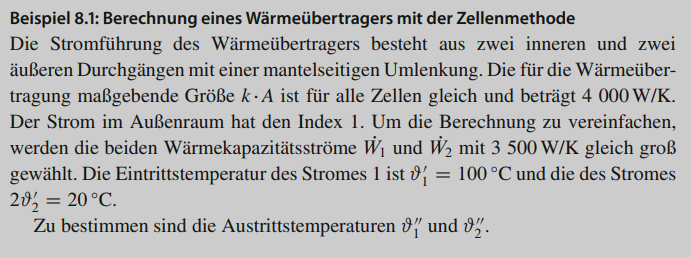

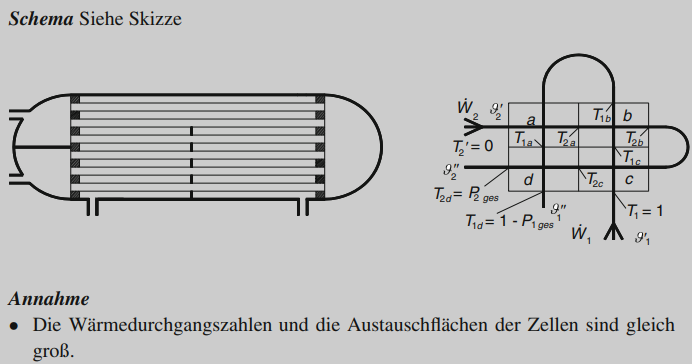

In [1265]:
display(Image("Bsp2_0.PNG"))
Image("Bsp2_1.PNG")


In [1266]:
kA = 4000
W1 = 3500
theta1_i = 100
W2 = 3500
theta2_i = 20

In [1267]:
NTU1 = get_NTU(kA,W1)
NTU1j = NTU1/4
NTU2 = get_NTU(kA,W2)
NTU2j = NTU2/4
display(NTU1j,NTU2j)

0.2857142857142857

0.2857142857142857

In [1268]:
R1, R2 = get_R(W1,W2)
display(R1,R2)

1.0

1.0

In [1269]:
P1j = round(1-exp((exp(-R1*NTU1j)-1)/R1),4)
P2j = round(1-exp((exp(-R2*NTU2j)-1)/R2),4)
display(P1j,P2j)

0.22

0.22

In [1270]:
Phi1 = P1j*np.eye(4)
Phi2 = P2j*np.eye(4)
Phi = get_Phi(Phi1,Phi2)
display(Phi)


array([[0.78, 0.  , 0.  , 0.  , 0.22, 0.  , 0.  , 0.  ],
       [0.  , 0.78, 0.  , 0.  , 0.  , 0.22, 0.  , 0.  ],
       [0.  , 0.  , 0.78, 0.  , 0.  , 0.  , 0.22, 0.  ],
       [0.  , 0.  , 0.  , 0.78, 0.  , 0.  , 0.  , 0.22],
       [0.22, 0.  , 0.  , 0.  , 0.78, 0.  , 0.  , 0.  ],
       [0.  , 0.22, 0.  , 0.  , 0.  , 0.78, 0.  , 0.  ],
       [0.  , 0.  , 0.22, 0.  , 0.  , 0.  , 0.78, 0.  ],
       [0.  , 0.  , 0.  , 0.22, 0.  , 0.  , 0.  , 0.78]])

In [1271]:
S11 = np.array([[0,1,0,0],[0,0,1,0],[0,0,0,0],[1,0,0,0]])   #Strom 1: von Zelle p in Zelle j ([Aus welcher Zelle der Storm 1 in die jeweilige Zelle kommt])
S12 = np.zeros((4,4))
S21 = np.zeros((4,4))
S22 = np.array([[0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0]])
S=get_S(S11,S12,S21,S22)
S

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.]])

In [1272]:
Inp1 = np.array([0,0,1,0]).reshape((4,1))
Inp2 = np.array([1,0,0,0]).reshape((4,1))
Inp = get_Inp(Inp1,Inp2)
Inp

array([[0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0]])

In [1273]:
T_I = np.array([[1],[0]])

In [1274]:
T_o = get_T_o(Phi,S,Inp,T_I)
T_o

array([[0.54166667],
       [0.69444444],
       [0.84722222],
       [0.52333333],
       [0.15277778],
       [0.30555556],
       [0.45833333],
       [0.47666667]])

In [1275]:
Out1 = np.array([0,0,0,1])
Out2 = np.array([0,0,0,1])
Out = get_Out(Out1,Out2)
Out

array([[0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [1276]:
T_O = Out@T_o
T_O

array([[0.52333333],
       [0.47666667]])

In [1277]:
theta_o = to_theta(T_o,theta1_i,theta2_i)
theta_o

array([[63.33333333],
       [75.55555556],
       [87.77777778],
       [61.86666667],
       [32.22222222],
       [44.44444444],
       [56.66666667],
       [58.13333333]])

In [1278]:
temps = np.sort(theta_o.reshape(2,4))
temps

array([[61.86666667, 63.33333333, 75.55555556, 87.77777778],
       [32.22222222, 44.44444444, 56.66666667, 58.13333333]])

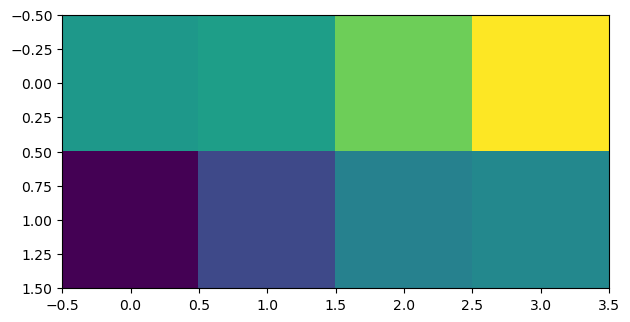

In [1279]:
plot_matrix(temps)

In [1280]:
theta_O = to_theta(T_O,theta1_i,theta2_i)
display(theta_O)
print(f"Austrittstemperaturen: \u03D1_1^o = {theta_O[0,0]}, \u03D1_2^o = {theta_O[1,0]}")

array([[61.86666667],
       [58.13333333]])

Austrittstemperaturen: ϑ_1^o = 61.866666666666674, ϑ_2^o = 58.13333333333333


## Bsp Strelow 4.3 Wärmeübertragerschaltung mit Stromteilung

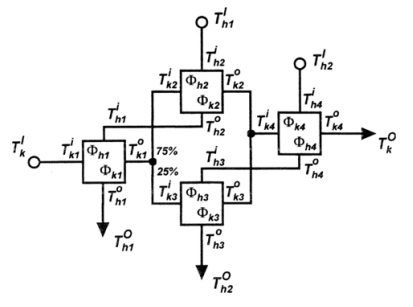

In [1281]:
Image("Bsp3.PNG")


In [1282]:
theta1_i1 = 373
theta1_i2= 405
theta2_i = 293

In [1283]:
Phi1 = np.matrix([[0.8,0,0,0],[0,0.6,0,0],[0,0,0.76,0],[0,0,0,0.64]])
Phi2 = np.matrix([[0.6,0,0,0],[0,0.6,0,0],[0,0,0.76,0],[0,0,0,0.16]])
Phi = get_Phi(Phi1,Phi2)
display(Phi)


matrix([[0.2 , 0.  , 0.  , 0.  , 0.8 , 0.  , 0.  , 0.  ],
        [0.  , 0.4 , 0.  , 0.  , 0.  , 0.6 , 0.  , 0.  ],
        [0.  , 0.  , 0.24, 0.  , 0.  , 0.  , 0.76, 0.  ],
        [0.  , 0.  , 0.  , 0.36, 0.  , 0.  , 0.  , 0.64],
        [0.6 , 0.  , 0.  , 0.  , 0.4 , 0.  , 0.  , 0.  ],
        [0.  , 0.6 , 0.  , 0.  , 0.  , 0.4 , 0.  , 0.  ],
        [0.  , 0.  , 0.76, 0.  , 0.  , 0.  , 0.24, 0.  ],
        [0.  , 0.  , 0.  , 0.16, 0.  , 0.  , 0.  , 0.84]])

In [1284]:
S11 = np.array([[0,1,0,0],[0,0,0,0],[0,0,0,1],[0,0,0,0]])   #Strom 1: von Zelle p in Zelle j ([Aus welcher Zelle der Storm 1 in die jeweilige Zelle kommt])
S12 = np.zeros((4,4))
S21 = np.zeros((4,4))
S22 = np.array([[0,0,0,0],[1,0,0,0],[1,0,0,0],[0,0.75,0.25,0]])
S=get_S(S11,S12,S21,S22)
S

array([[0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.75, 0.25, 0.  ]])

In [1285]:
Inp1 = np.matrix([[0,0],[1,0],[0,0],[0,1]])
Inp2 = np.array([1,0,0,0]).reshape((4,1))
Inp = get_Inp(Inp1,Inp2)
Inp

matrix([[0, 0, 0],
        [1, 0, 0],
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [1286]:
T_I = np.array([[373],[405],[293]])

In [1287]:
T_o = get_T_o(Phi,S,Inp,T_I)
T_o

matrix([[303.],
        [343.],
        [335.],
        [373.],
        [323.],
        [353.],
        [361.],
        [363.]])

In [1288]:
Out1 = np.matrix([[1,0,0,0],[0,0,1,0]])
Out2 = np.matrix([[0,0,0,1]])
Out = get_Out(Out1,Out2)
Out

matrix([[1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1]])

In [1289]:
T_O = Out@T_o
T_O

matrix([[303.],
        [335.],
        [363.]])

## Bsp HUE2 TTFD

In [1290]:
theta1_i = 120
theta2_i = 15

In [1291]:
Phi1 = np.matrix([[0.608,0,0],[0,0.597,0],[0,0,0.605]])
Phi2 = np.matrix([[0.048,0,0],[0,0.047,0],[0,0,0.048]])
Phi = get_Phi(Phi1,Phi2)
display(Phi)


matrix([[0.392, 0.   , 0.   , 0.608, 0.   , 0.   ],
        [0.   , 0.403, 0.   , 0.   , 0.597, 0.   ],
        [0.   , 0.   , 0.395, 0.   , 0.   , 0.605],
        [0.048, 0.   , 0.   , 0.952, 0.   , 0.   ],
        [0.   , 0.047, 0.   , 0.   , 0.953, 0.   ],
        [0.   , 0.   , 0.048, 0.   , 0.   , 0.952]])

In [1292]:
S11 = np.array([[0,0,0],[0,0,0],[0,0,0]])   #Strom 1: von Zelle p in Zelle j ([Aus welcher Zelle der Storm 1 in die jeweilige Zelle kommt])
S12 = np.zeros((3,3))
S21 = np.zeros((3,3))
S22 = np.array([[0,0,0],[1,0,0],[0,1,0]])
S=get_S(S11,S12,S21,S22)
S

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [1293]:
Inp1 = np.matrix([[1,0,0],[0,1,0],[0,0,1]])
Inp2 = np.array([1,0,0]).reshape((3,1))
Inp = get_Inp(Inp1,Inp2)
Inp

matrix([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])

In [1294]:
T_I = np.array([[1],[1],[1],[0]])

In [1295]:
T_o = get_T_o(Phi,S,Inp,T_I)
T_o

matrix([[0.392     ],
        [0.431656  ],
        [0.45111012],
        [0.048     ],
        [0.092744  ],
        [0.13629229]])

In [1296]:
Out1 = np.matrix([[1,0,0],[0,1,0],[0,0,1]])
Out2 = np.matrix([[0,0,1]])
Out = get_Out(Out1,Out2)
Out

matrix([[1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1]])

In [1297]:
T_O = Out@T_o
T_O

matrix([[0.392     ],
        [0.431656  ],
        [0.45111012],
        [0.13629229]])

In [1298]:
theta_o = to_theta(T_O,theta1_i,theta2_i)
theta_o

matrix([[56.16      ],
        [60.32388   ],
        [62.3665626 ],
        [29.31069024]])